### Quick Analysis
In this notebook, we explore a synthetic dataset that links daily habits to sleep duration.
We take a quick look at the data, clean outliers, visualize feature distributions, and check correlations - all to prepare the dataset for a prediction model.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

# Load the dataset about sleep time 
df = pd.read_csv("sleeptime_prediction_dataset.csv")
df.head()


,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


In [69]:
# Let's check the shape, missing values and data types of the dataset 
print("Dataset shape (rows, columns):")
df.shape

Dataset shape (rows, columns):


(2000, 7)

In [70]:
print("Missing values per column:")
df.isnull().sum()


Missing values per column:


WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64

In [71]:
print("Data types of each column:")
df.dtypes


Data types of each column:


WorkoutTime       float64
ReadingTime       float64
PhoneTime         float64
WorkHours         float64
CaffeineIntake    float64
RelaxationTime    float64
SleepTime         float64
dtype: object

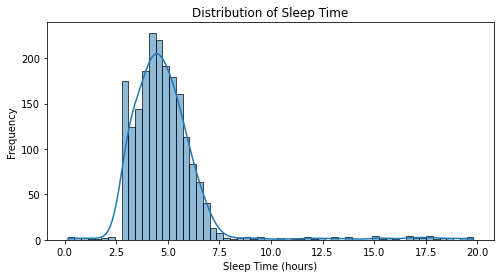

In [72]:
# Plot histogram of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(df["SleepTime"], bins=60, kde=True)
plt.title("Distribution of Sleep Time")
plt.xlabel("Sleep Time (hours)")
plt.ylabel("Frequency")
plt.show()


Histogram summaries:
- The histogram shows that most sleep durations fall between 3 and 6 hours, with a peak around 4.5–5 hours.
- Distribution is asymmetrical (positively skewed): long tail to the right
- Outliers: some values ​​reach 20 hours, which is probably unrealistic

In [73]:
# Check the outliers
df["SleepTime"].describe()

count    2000.000000
mean        4.884375
std         2.028892
min         0.150000
25%         3.840000
50%         4.600000
75%         5.470000
max        19.810000
Name: SleepTime, dtype: float64

In [74]:
# Show rows with extreme sleep durations
df[df["SleepTime"] > 12].head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
10,0.06,0.07,1.14,8.82,251.82,1.77,15.94
159,2.18,1.50,3.26,9.02,234.99,1.67,17.77
212,1.96,0.04,3.18,6.41,4.75,0.24,17.87
213,0.67,1.93,1.93,6.10,167.34,1.14,15.57
251,1.16,1.82,1.25,5.04,293.55,0.51,15.69


In [75]:
# Filter out extreme values
df_filtered = df[(df["SleepTime"] >= 1.0) & (df["SleepTime"] <= 12.0)]
df_filtered["SleepTime"].describe()

count    1955.000000
mean        4.669872
std         1.183617
min         1.100000
25%         3.830000
50%         4.580000
75%         5.410000
max        11.920000
Name: SleepTime, dtype: float64

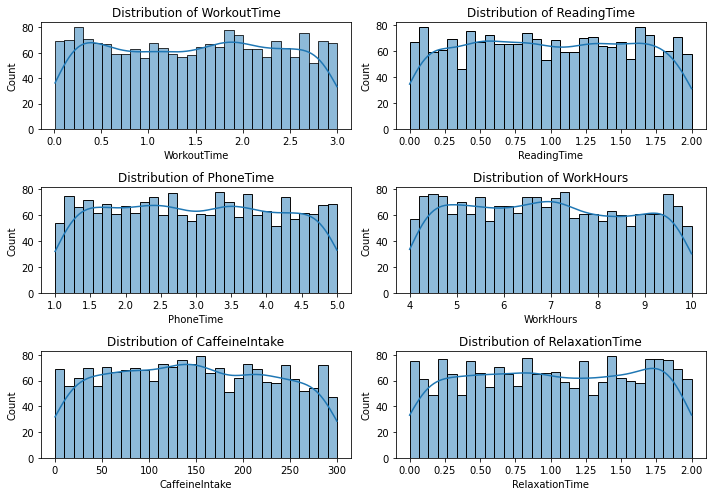

In [76]:
# Drop target column
feature_cols = df_filtered.drop(columns=["SleepTime"]).columns

# Plot histograms for each feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
for i, col in enumerate(feature_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_filtered[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
plt.show()


Most input features are evenly distributed, reflecting the synthetic nature of the dataset. No major skewness or heavy tails are observed, which suggests no transformation is needed for modeling.

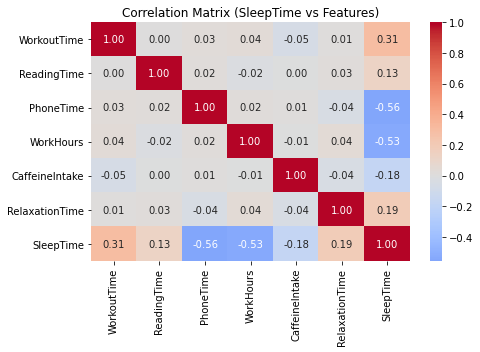

In [78]:
# Compute correlation matrix and plot heatmap
numeric_df = df_filtered.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Correlation Matrix (SleepTime vs Features)")
plt.tight_layout()
plt.show()

In [ ]:
# Compute interactive correlation matrix
corr_matrix = df_filtered.corr().round(2)
cols = corr_matrix.columns.tolist()

# Here we transpose the matrix
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values.T,    
    x=cols,                  
    y=cols,
    colorscale='RdBu',
    showscale=True,
    zmid=0
)

fig.update_layout(
    title="Correlation Matrix (SleepTime vs Features)",
    width=600,
    height=400,
    xaxis=dict(side='bottom')  
)

fig.show()


### What we learned from the data

Before diving into model building, we explored the data to see what daily habits might be linked to sleep duration. Here's what we found:

- The dataset includes 2,000 synthetic records of daily lifestyle habits and their effect on sleep. After removing a few unrealistic outliers (like 20 hours of sleep), we ended up with 1,955 clean entries.
- All features are numerical and evenly spread - no missing values.
- Most people in the dataset "sleep" around 5 hours - not ideal, but that's what the data says! Extreme outliers (>12 hours or <1 hour) were removed to improve model stability.
- Correlation analysis revealed the following:
  - **More time on your phone** or **more work hours** strongly relate to sleeping less (negative correlation -0.56 and -0.53).
  - **WorkoutTime** has the highest positive correlation (+0.31).
  - Other habits like reading or relaxing showed only minor effects on sleep.

Overall, the dataset appears clean, balanced, and ready for regression modeling.

